# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

In [9]:
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2
from Model import RetirementModelClass
import numpy as np
import matplotlib.pyplot as plt
import funs
import figs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solution and simulation

### Solve model and initialize simulation

In [66]:
model = RetirementModelClass(name='baseline',solmethod='egm')
#print(model)
model.solve()

In [71]:
# Wealth distribution
np.random.seed(2019)
M_init = np.random.lognormal(np.log(1.3),0.8,model.par.simN)
print('mean:',np.mean(M_init))
print('std:',np.std(M_init))

# Allocate states
state_men = funs.create_states(model,'male',0.95,0.2,0.55)
state_women = funs.create_states(model,'female',0.97,0.27,0.78)

mean: 1.8171260592389304
std: 1.662764603726976
fractions: [0.5  0.2  0.55]
fractions: [0.97 0.27 0.78]


### Simulate model - Men

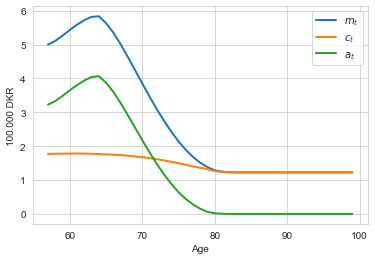

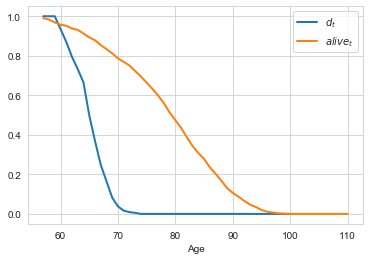

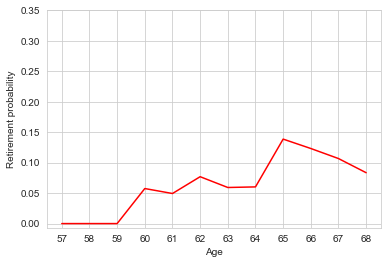

In [72]:
model.par.simStates = state_men
model.simulate()
figs.lifecycle(model,ages=[57,110])
figs.lifecycle(model,['d','alive'],ages=[57,110])
figs.retirement_probs(model)

### Simulate model - Women

AttributeError: 'AxesSubplot' object has no attribute 'figs'

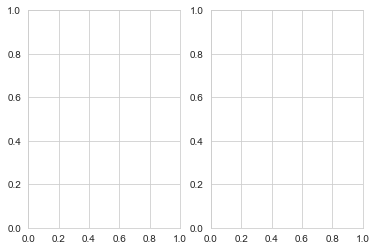

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.figs.retirement_probs(model)
ax2.figs.retirement_probs(model)

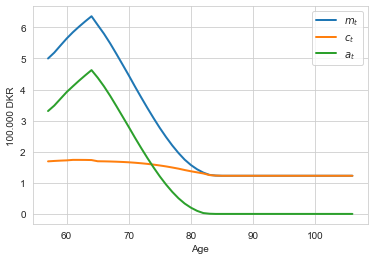

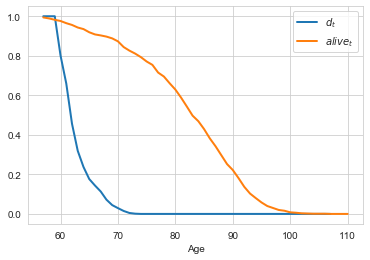

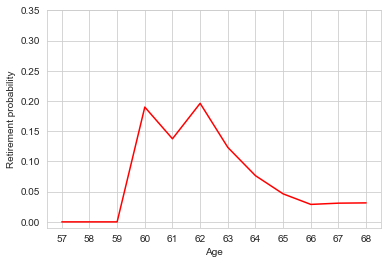

In [6]:
model.par.simStates = state_women
model.simulate()
figs.lifecycle(model,ages=[57,110])
figs.lifecycle(model,['d','alive'],ages=[57,110])
figs.retirement_probs(model)

# Time the model

In [22]:
model = RetirementModelClass(name='baseline',solmethod='egm')
model.par.simStates = np.random.randint(16,size=model.par.simN) # allocate random states

In [23]:
def solve():
    model.solve()
    
def simulate():
    model.simulate()

funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve'),
             (funcs[1], 'simulate')])

In [24]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+----------+------+--------+------+------+-------+
|   func   |  lq  | median | mean |  uq  | neval |
+----------+------+--------+------+------+-------+
|  solve   | 4.61 |  4.63  | 4.72 | 4.9  |  10.0 |
| simulate | 1.62 |  1.64  | 1.69 | 1.75 |  10.0 |
+----------+------+--------+------+------+-------+


# OLD

# Time parts of the model

# Visualize the solution

In [7]:
import figs
from transitions import age

# Visualize the simulation

C:\Users\Frederik\Desktop\speciale_retirement\kode\Speciale_retirement\Main\figs.py:144: RuntimeWarning: Mean of empty slice
  ax.plot(age,np.nanmean(simdata,axis=1),lw=2,label=simvardict[i])


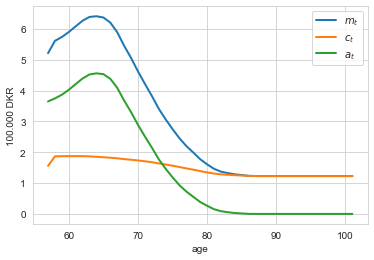

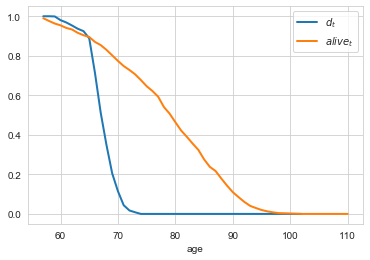

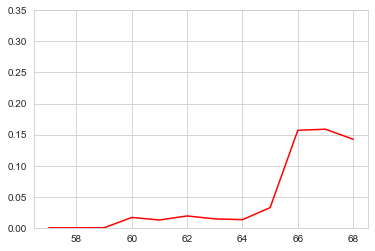

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from transitions import age
par = model.par
sim = model.sim

avg_probs = np.zeros(12)
for t in range(len(avg_probs)):
    avg_probs[t] = np.mean(sim.probs[t])#/np.count_nonzero(sim.probs[t])
    
plt.ylim(top=0.35)
plt.plot(age(np.arange(12)),avg_probs,'r')

In [16]:
import transitions
a = np.zeros(1000)
for i in range(len(model.sim.states)):
    a[i] = transitions.state_translate(model.sim.states[i],'elig',model.par)
    
np.sum(a)

100.0

In [17]:
model.par.states

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [18]:
model.par.var

{'male': 0, 'elig': 1, 'high_skilled': 2, 'children': 3}

In [43]:
500*0.97

485.0

# OLD

In [2]:
model = RetirementModelClass(name='baseline',solmethod='egm')
model.write_run_file(filename='run.py',method='test') # open run.py and have a look
!python run.py

solution time: 1.8 secs


In [ ]:
from consav import runtools
model.write_run_file(filename='run.py',solmethod='egm',method='test',Na=500)

for threads in [8,4,2,1]:
    runtools.write_numba_config(threads=threads)
    print(f'threads = {threads}')
    !python run.py
    print('')

threads = 8


In [12]:
import figs
from transitions import age

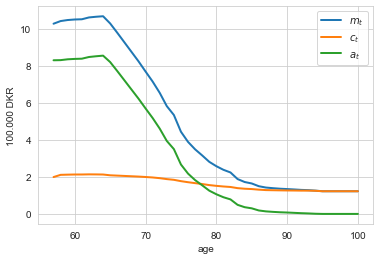

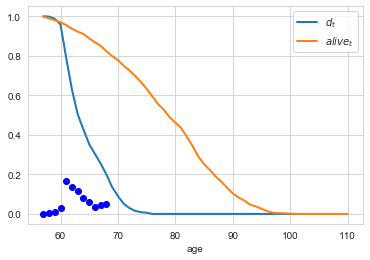

In [24]:
figs.lifecycle(model)
figs.lifecycle(model,['d','alive'])

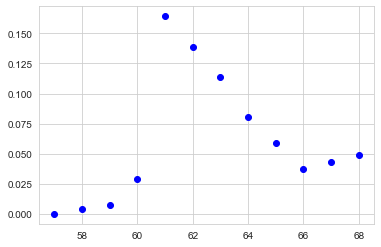

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from transitions import age
par = model.par
sim = model.sim

avg_probs = np.zeros(12)
for t in range(len(avg_probs)):
    avg_probs[t] = np.nanmean(sim.probs[t])
    
plt.plot(age(np.arange(12)),avg_probs,'bo')

In [4]:
sol = model.sol
#sol.c[5,0] - sol.c[5,7]

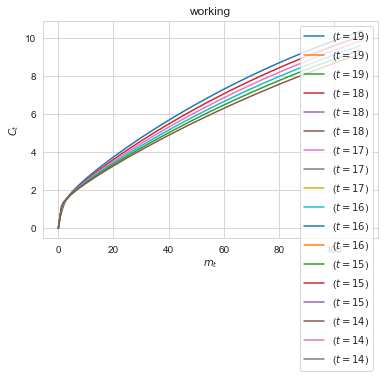

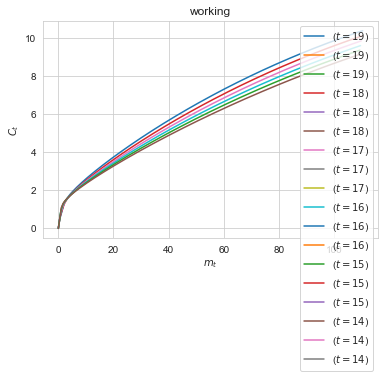

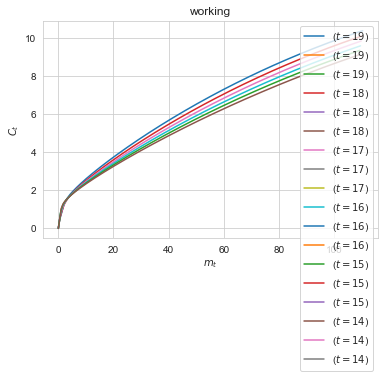

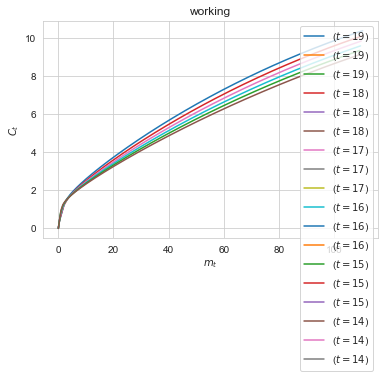

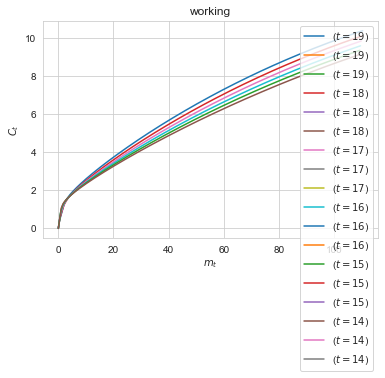

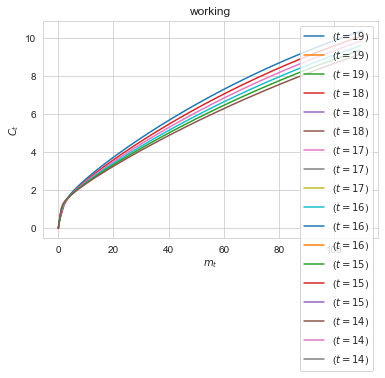

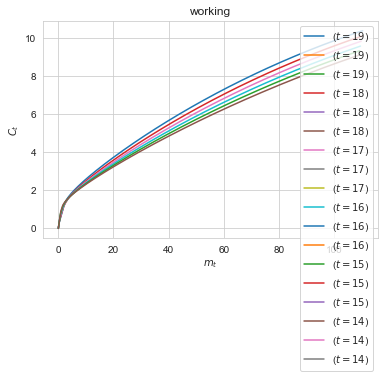

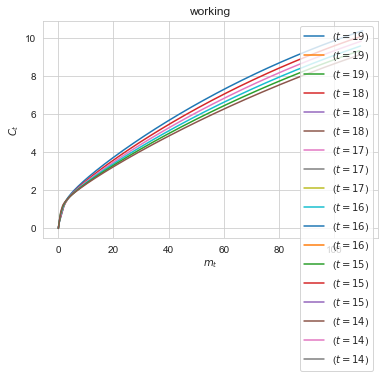

In [6]:
import figs
for st in model.par.states:
    figs.cons_choice(model,[19,18,17,16,15,14],st,choice='work')

In [7]:
figs.cons_choice(model,[model.par.T-5],choice='retire')

TypeError: cons_choice() missing 1 required positional argument: 'st'

In [83]:
#utility.inv_marg_func(model.sol.q[19],model.par)

In [84]:
#model.sol.c[15]

In [8]:
figs.cons_choice(model,[7,8,9],choice='work')

TypeError: cons_choice() missing 1 required positional argument: 'st'